### 4.2 YOLO11快速上手
#### 4.2.2 Python接口使用方式

In [1]:
from ultralytics import YOLO
# 加载预训练模型
model = YOLO("yolo11n.pt")

In [2]:
# 使用预训练模型对单张图片进行预测
results = model.predict(source='./images/dog.png', save=True, save_txt=True)


image 1/1 F:\YOLO11\chapter02\images\dog.png: 480x640 1 bicycle, 1 car, 1 truck, 1 dog, 141.9ms
Speed: 38.0ms preprocess, 141.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict4
1 label saved to runs\detect\predict4\labels


In [36]:
print('查看类别数量:',len(results[0].names))
print('查看检测结果类别对应的名称:',
      {16:results[0].names[16],1:results[0].names[1],
       2:results[0].names[2],7:results[0].names[7]})

查看类别数量: 80
查看检测结果类别对应的名称: {16: 'dog', 1: 'bicycle', 2: 'car', 7: 'truck'}


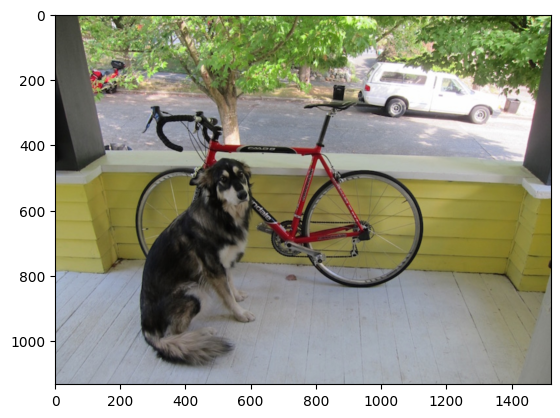

In [38]:
# 对原始图片进行展示
import matplotlib.pyplot as plt
import cv2
plt.imshow(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))

In [41]:
# 查看属性boxes信息
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16.,  1.,  2.,  7.])
conf: tensor([0.9252, 0.9083, 0.5145, 0.4804])
data: tensor([[2.5843e+02, 4.4074e+02, 6.1592e+02, 1.0764e+03, 9.2522e-01, 1.6000e+01],
        [2.4548e+02, 2.6696e+02, 1.1297e+03, 8.3397e+02, 9.0833e-01, 1.0000e+00],
        [9.3017e+02, 1.4500e+02, 1.3699e+03, 3.3653e+02, 5.1451e-01, 2.0000e+00],
        [9.2782e+02, 1.4402e+02, 1.3697e+03, 3.3656e+02, 4.8043e-01, 7.0000e+00]])
id: None
is_track: False
orig_shape: (1133, 1521)
shape: torch.Size([4, 6])
xywh: tensor([[ 437.1754,  758.5804,  357.4878,  635.6725],
        [ 687.5789,  550.4636,  884.1884,  567.0154],
        [1150.0614,  240.7641,  439.7748,  191.5305],
        [1148.7700,  240.2908,  441.9099,  192.5363]])
xywhn: tensor([[0.2874, 0.6695, 0.2350, 0.5611],
        [0.4521, 0.4858, 0.5813, 0.5005],
        [0.7561, 0.2125, 0.2891, 0.1690],
        [0.7553, 0.2121, 0.2905, 0.1699]])
xyxy: tensor([[ 258.4315,  440.7441,  615.9193, 107

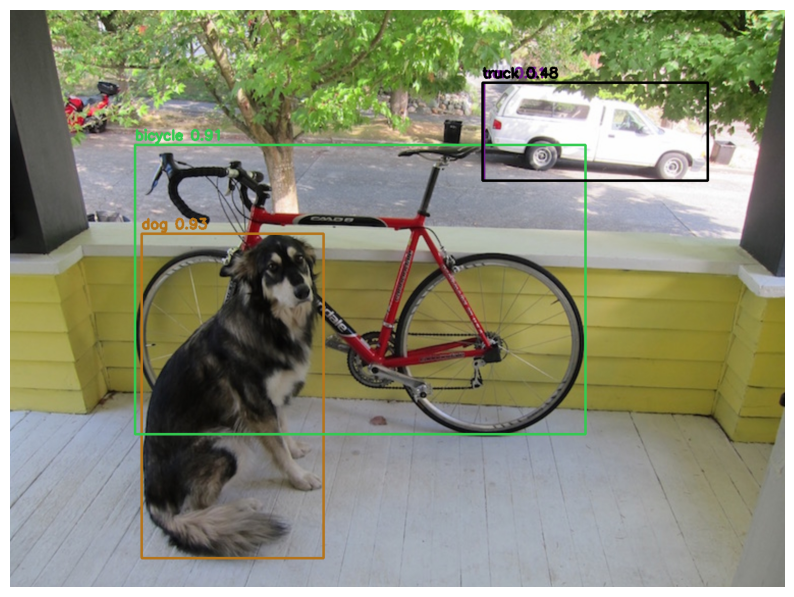

In [49]:
# 给原始图片添加边框及标签和置信度
import numpy as np

# 为每个类别分配唯一颜色
def get_colors(num_classes):
    colors = [(np.random.randint(0, 256), np.random.randint(0, 256), 
               np.random.randint(0, 256)) for _ in range(num_classes)]
    return colors

# 使用自定义颜色
colors = get_custom_colors()

# 处理并显示检测结果图片
for result in results:
    # 获取原始图像
    im_array = result.orig_img.copy()  # 创建图像副本以避免修改原始图像
    
    # 获取边界框信息，默认存储在GPU上
    boxes_gpu = result.boxes
    
    # 将边界框信息转换到CPU上，并转换为NumPy数组
    boxes_cpu = result.boxes.cpu().numpy()
    
    # 获取类别名称映射
    class_names = result.names
    
    # 获取类别数量
    num_classes = len(class_names)
    
    # 分配颜色
    colors = get_colors(num_classes)
    
    for box in boxes_cpu:
        r = box.xyxy[0].astype(int)
        cls = int(box.cls[0])
        conf = round(float(box.conf[0]), 2)
        
        # 获取当前类别的颜色
        color = colors[cls]
        
        # 在图像上绘制边界框和标签
        cv2.rectangle(im_array, (r[0], r[1]), (r[2], r[3]), color, 3)
        label = f'{class_names[cls]} {conf}'
        cv2.putText(im_array, label, (r[0], r[1] - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 3)
    
    # 使用Matplotlib显示结果图片
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 关闭坐标轴
    plt.show()

In [51]:
# 将模型保存到本地
model.export(format='onnx')

Ultralytics 8.3.51  Python-3.10.16 torch-2.5.1+cpu CPU (Intel Core(TM) i7-4720HQ 2.60GHz)

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.44...
ONNX: export success  3.5s, saved as 'yolo11n.onnx' (10.2 MB)

Export complete (4.0s)
Results saved to F:\YOLO11\chapter02
Predict:         yolo predict task=detect model=yolo11n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolo11n.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app


'yolo11n.onnx'

#### 4.2.3的配置

In [52]:
from ultralytics import settings
print(settings)

JSONDict("C:\Users\Daniel\AppData\Roaming\Ultralytics\settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "C:\\Users\\Daniel\\datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "4e6f33701d787445488ae3a34e3909dfe88025cef2b0991266f48a91eea4295e",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": true,
  "vscode_msg": true
}


In [57]:
# 将TensorBoard修改为False
settings.update({"tensorboard":False})

### 4.4 基于PandasAI调用大模型
#### 4.4.2 PandasAI的安装及使用

In [1]:
# 导入库
from pandasai import SmartDataframe, Agent
import pandas as pd

In [2]:
# 初始化大模型
from pandasai.llm.openai import OpenAI
llm = OpenAI(api_base="https://spark-api-open.xf-yun.com/v1", 
             api_token="NcZwdawOSTLxroqsYZTk:DgdzdubocPOLrEYRaOxC", 
             model='generalv3.5')

In [23]:
# 数据准备
sales_by_country = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "sales": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})
sales_by_country

,country,sales
0,United States,5000
1,United Kingdom,3200
2,France,2900
3,Germany,4100
4,Italy,2300
5,Spain,2100
6,Canada,2500
7,Australia,2600
8,Japan,4500
9,China,7000


In [24]:
# 实例化SmartDataframe并指定LLM
sdf = SmartDataframe(sales_by_country, config={"llm": llm})

In [25]:
# 查询数据
sdf.chat("哪五个国家GDP最高的?用文字回答，不要画图")

,country,sales
9,China,7000
0,United States,5000
8,Japan,4500
3,Germany,4100
1,United Kingdom,3200


In [32]:
### Agent ###
# 实例化Agent
agent = Agent(sales_by_country,config={'llm':llm})

In [22]:
# 数据查询
agent.chat('销量前五的国家，不要画图')

,country,sales
9,China,7000
0,United States,5000
8,Japan,4500
3,Germany,4100
1,United Kingdom,3200


In [33]:
# 绘制图形
agent.chat('绘制销量前五的国家的柱状图')

'F:/YOLO11/chapter02/exports/charts/temp_chart.png'

In [34]:
# 查看最后生成的代码
print(agent.last_code_generated)

# TODO: import the required dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Write code here
df = dfs[0]
top_5_countries = df.nlargest(5, 'sales')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['country'], top_5_countries['sales'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Top 5 Countries by Sales')
plt.savefig('top_5_sales_countries.png')
plt.close()

# Declare result var: 
result = {"type": "plot", "value": "top_5_sales_countries.png"}
